In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn import datasets
from sklearn import decomposition
from sklearn.cluster import MiniBatchKMeans

In [3]:
rng = RandomState(0)
faces, _ = datasets.fetch_olivetti_faces(return_X_y = True, shuffle = True, random_state = rng)
sizex = len(faces)
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)
n_samples, n_features = faces.shape
faces_centered = faces - faces.mean(axis=0)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

In [4]:
faces_centered.shape

(400, 4096)

In [5]:
def plot(imagem):
    plt.figure()
    for i, comp in enumerate(imagem):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                       interpolation='nearest',
                       vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
        if i == (n_row*n_col)-1:
            break
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [6]:
W = np.random.rand(1,faces.shape[1])

In [12]:
def online(a):
    global faces_centered
    global W
    global sizex
    a = a
    Want = W
    it = 0
    ww = list()
    cont = 0
    f = 1
    for n in range(sizex):
       # if cont == 5:
          #  w1 = vect[0]
          #  w2 = w1 - ((vect[1].dot(w1))*w1)
           # w2 = w2/np.linalg.norm(w2)
        #if n == 0 or cont == 5:
            #cont = 0
            #vect = list()
        y = (W).dot(faces_centered[n,:])
        c = (faces_centered[n,:].T)*(y)
        d = y*y*(W)
        dw = a*(c - d)
        W1 = W
        W= W+dw
    return W
      #  if cont <5:
           # vect.append(W)
       #if cont >= 1:
           # normw = np.linalg.norm(W)
           # W2 = (W1 - ((W.dot(W1.T))*W1))
           # yyy = W1-(W.dot(W1.T))*W1


In [13]:
#w1 = v1
#w2 = (w1 - (v2.dot(w1))*w1)
#w2 = w2/np.linalg.norm(w2)

In [14]:
A = online(0.01)

In [25]:
A.reshape(64,64)

array([[-0.02397171, -0.02548869, -0.02884628, ...,  0.02578264,
         0.0146465 ,  0.01119318],
       [-0.02626963, -0.02919812, -0.03078773, ...,  0.02739712,
         0.0180235 ,  0.010892  ],
       [-0.02948203, -0.03051631, -0.03023405, ...,  0.02776446,
         0.01830041,  0.01047923],
       ...,
       [ 0.00183096, -0.0039354 , -0.01177213, ...,  0.00215325,
         0.00428804,  0.00059253],
       [ 0.00072773, -0.00410753, -0.01215967, ...,  0.00285904,
         0.00337352,  0.00126476],
       [-0.00143143, -0.00294508, -0.01294063, ...,  0.00611743,
         0.0054762 ,  0.00279811]])

In [15]:
A.dot(A.T)

array([[1.28556246]])

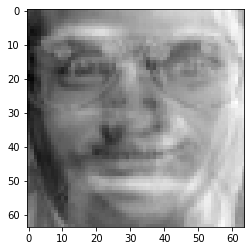

In [16]:
plt.imshow(A.reshape((64,64)), cmap = plt.cm.gray)

In [17]:
Y = faces_centered.T*A.T
Y.shape

(4096, 400)

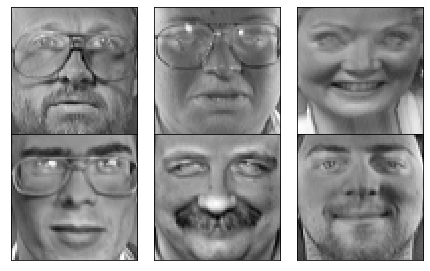

In [18]:
plot(faces_centered)

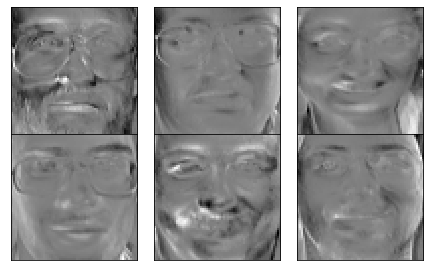

In [19]:
plot(Y.T)

In [20]:
print(Y.T)

[[-6.65597808e-03 -5.36538618e-03 -5.21690183e-03 ... -1.38416776e-03
  -1.21916356e-03 -6.37134464e-04]
 [-9.90777324e-03 -9.34958922e-03 -9.01074111e-03 ...  1.26573410e-03
   1.96761213e-03  1.08367383e-03]
 [-4.01890545e-04  1.07382336e-03  1.83213648e-03 ...  2.63168881e-03
   2.26259989e-03  7.95028103e-04]
 ...
 [-2.99852448e-03 -3.47765846e-03 -4.27250264e-03 ... -1.07887361e-03
  -7.64839570e-04 -4.16556341e-04]
 [-2.15574486e-03 -1.42296995e-03 -7.55156861e-04 ...  7.03068059e-04
   5.13511319e-04  2.71314686e-04]
 [ 1.44608664e-03  3.14407035e-03  5.48628836e-03 ... -3.91469358e-05
  -5.58223812e-04 -1.95360090e-04]]


In [21]:
data = faces_centered
pca1 = decomposition.PCA(n_components = n_components, svd_solver='randomized', whiten = True)
nfm = decomposition.NMF(n_components = n_components, init='nndsvda', tol = 5e-3)
ica = decomposition.FastICA(n_components=n_components, whiten=True)
sparsepca = decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,n_iter=100, batch_size=3,random_state=rng)
dic = decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,n_iter=50, batch_size=3,random_state=rng)

In [22]:
def test(estimador):
    global data
    global n_components
    estimador.fit(data)
    componentes = estimador.components_
    plot(componentes[:n_components])
    print(componentes)

[[-2.85011455e-02 -3.21027599e-02 -3.57244574e-02 ...  2.56915092e-02
   2.24477518e-02  2.03093886e-02]
 [ 9.13925702e-04  6.00802305e-05  1.00978138e-03 ... -2.00161953e-02
  -1.86901055e-02 -1.66745819e-02]
 [ 1.05345789e-02  3.26586096e-03 -8.05984717e-03 ...  5.47986440e-02
   5.60212210e-02  5.34061901e-02]
 [-1.71217676e-02 -1.40991006e-02 -1.61991641e-02 ... -2.84845866e-02
  -3.06695793e-02 -3.18116844e-02]
 [ 3.14381011e-02  3.47975791e-02  3.27315442e-02 ... -6.49539381e-03
  -8.09461903e-03 -6.12116372e-03]
 [-3.41959447e-02 -2.58442033e-02 -1.74522940e-02 ... -9.89250839e-03
  -1.40937530e-02 -1.11769615e-02]]


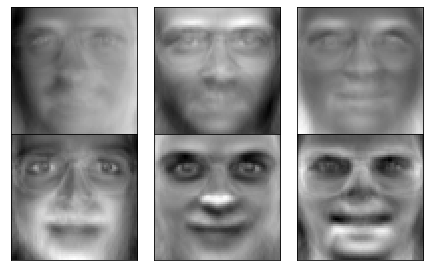

In [61]:
test(pca1)

c:\users\aleke\appdata\local\programs\python\python38\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


[[ 6.81929031e-05 -1.19034020e-04 -1.36803015e-04 ...  2.16154221e-04
   3.32893191e-04  3.09273785e-04]
 [ 8.92567785e-04  7.81218742e-04  5.43419451e-04 ... -1.30659711e-04
  -1.02966970e-04 -1.35097358e-04]
 [-1.50952606e-04 -3.97610907e-04 -6.50413559e-04 ...  9.76740129e-04
   1.03659381e-03  8.98778062e-04]
 [ 5.07566132e-04  4.21351857e-04  4.02182119e-04 ...  7.93827847e-04
   8.15347772e-04  8.16437861e-04]
 [ 7.66292819e-04  6.62416333e-04  4.61893221e-04 ...  1.02935417e-03
   1.06757000e-03  1.06243153e-03]
 [-1.08349687e-03 -9.91501433e-04 -9.08453671e-04 ...  2.10410364e-04
   1.04425892e-04  1.35093817e-04]]


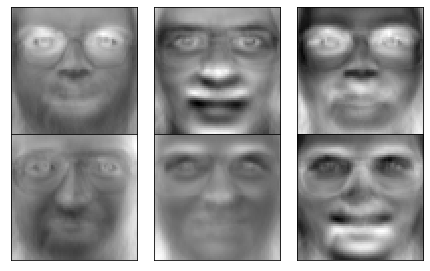

In [62]:
test(ica)

[[-0.08980572 -0.09956138 -0.11183022 ...  0.0804401   0.06996928
   0.06231193]
 [ 0.00789071  0.00542447  0.00860015 ... -0.03797404 -0.03565025
  -0.03139415]
 [ 0.0001362  -0.01086092 -0.03251518 ...  0.06773026  0.06835523
   0.06372858]
 [ 0.02284514  0.01149364  0.00593761 ...  0.10203894  0.10655238
   0.10589441]
 [-0.02887386 -0.03437384 -0.03117128 ... -0.00671583 -0.00323668
  -0.00788006]
 [-0.04673641 -0.04439886 -0.03477393 ... -0.03005224 -0.0298328
  -0.03009023]]


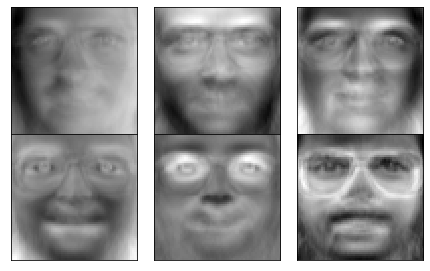

In [63]:
test(fa)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01738038 0.02442087 0.         ... 0.         0.         0.        ]
 [0.01176633 0.         0.         ... 0.         0.00503923 0.00304833]
 [0.         0.         0.         ... 0.09837337 0.09317103 0.08396669]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04218957 0.05304866 0.08729384 ... 0.         0.         0.        ]]


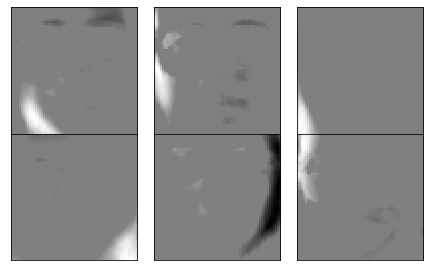

In [64]:
test(sparsepca)

[[ 0.00345402 -0.00510227 -0.02138898 ...  0.0132092  -0.00370115
  -0.01241563]
 [ 0.00678268  0.01377512  0.02492818 ... -0.0487592  -0.04129256
  -0.03907999]
 [-0.02098055 -0.01990426 -0.01396742 ...  0.02664567  0.02629525
   0.02300095]
 ...
 [-0.00913275 -0.00812865 -0.00628679 ...  0.01458469  0.01194073
   0.00890716]
 [ 0.00363168  0.00456789  0.00136148 ...  0.03653959  0.03946525
   0.03407178]
 [ 0.01600388  0.01391357  0.00433674 ...  0.02782215  0.02495076
   0.03122679]]


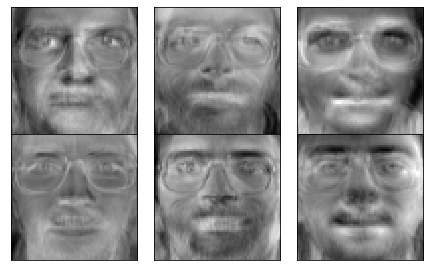

In [65]:
test(dic)